In [1]:
#importing the required libraries
import h5py
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from multiprocessing.dummy import Pool as ThreadPool
import multiprocessing
import random
import time

#loading data files and storing them in an array
with h5py.File("./images_training.h5", "r") as H:
    train_data = np.copy(H['data'])

with h5py.File("./labels_training.h5", "r") as H:
    train_label = np.copy (H['label'])
    
with h5py.File("./images_testing.h5", "r") as T:
    test_data = np.copy(T['data'])

with h5py.File("./labels_testing_2000.h5", "r") as T:
    test_label = np.copy(T['label'])

In [2]:
#the data file type
print(type(train_data))
print(type(train_label))
print(type(test_data))
print(type(test_label))

#the shapes of numpy arrays
print(train_data.shape)
print(test_data.shape)
print(train_label.shape)
print(test_label.shape)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(30000, 28, 28)
(5000, 28, 28)
(30000,)
(2000,)


In [3]:
#finding the unique labels
print("The unique image labels are")
print(np.shape(np.unique(train_label))[0])
print(np.unique(train_label))

The unique image labels are
10
[0 1 2 3 4 5 6 7 8 9]


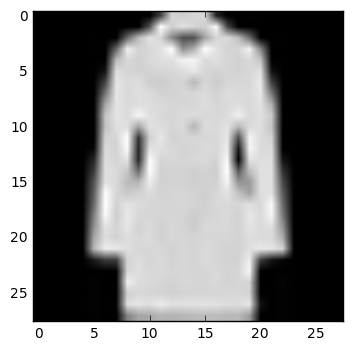

In [4]:
#randomly displaying a specimen from the training data
fashion_specimen = train_data[12]
plt.imshow(fashion_specimen, cmap='gray')
plt.grid(False)
plt.show()

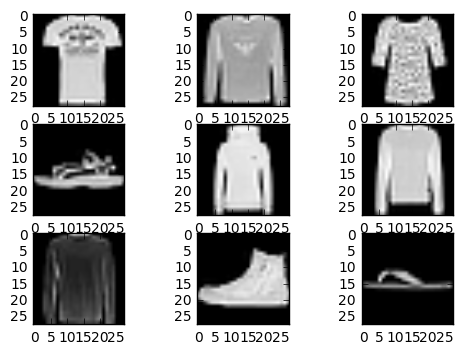

In [5]:
#visualising training dataset samples
for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.imshow(train_data[i], cmap='gray')
plt.show()

In [6]:
# Data Preprocessing
train_len = np.shape(train_data)[0]  #gives the length of training data
def image_vectors(data1):
    #creating empty matrix with 30000 rows and 28*28=784 columns
    data_matrix = np.empty([data1.shape[0], data1.shape[1]*data1.shape[2]],dtype=float)  
    for i in range (train_len):
        data_matrix[i] = data1[i].ravel()  #building matrix with image vectors 
    return data_matrix

x = image_vectors(train_data)  

#implementing k-NN 
def euclidean_dist (y, k):   
    dist = np.argsort(np.sum(((x-y.ravel())**2), axis=1))[:k]  
    return (stats.mode (train_label[dist])[0][0]) #mode returns smallest value

In [7]:
#number of processes which will run in parallel
process= multiprocessing.cpu_count()
pool = ThreadPool(process)

tsize = test_data.shape[0] #5000
k_neighbor = 7  #odd values of k prevents ties

#predicting the labels for the test data
start = time.time()
predicted = pool.starmap(euclidean_dist, list( zip(test_data[:tsize], [k_neighbor] * tsize) ) )

#parallel processes will terminate
pool.close() 
pool.join()
end = time.time()
knn_time = end - start
pool = None

In [8]:
#new file is created to store predicted labels
with h5py.File('predicted_labels.h5','w') as P:
    P.create_dataset('label',data=predicted)

#calculating accuracy using given 2000 test labels
t_actual = test_label[:2000]
t_predicted = predicted[:2000]
accuracy = len(np.where((t_predicted-t_actual)==0)[0])
percentage= accuracy/2000 * 100

In [9]:
#displaying the results of k-NN algorithm implementation
print("Accurate predictions amongst given 2000 test labels is %d" % accuracy)
print("Percentage accuracy is %.2f" % percentage)
print("Runtime= %.f seconds" % knn_time)

Accurate predictions amongst given 2000 test labels is 1679
Percentage accuracy is 83.95
Runtime= 1205 seconds
